

# Project: Investigate a Dataset - Database_TMDb_movie_data



Investigate a Dataset - Database_TMDb_movie_data
Introduction


Dataset Description
This data set contains information over 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  The database has 10866 rows and 21 columns. The columns include:
Id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tangline, overview, runtime, genre, production_company, release_date, vote_count, vote_average, release_year, budject_adj, and revenue_adj.




Questions for analysis
1. What is the association between movies with tagline and revenue/adjusted revenue(renvenue_adj)
2. What decade are the most popular movies released; how much revenue was recorded that year?


First things first, we import the required packages needed for this analysis. We will import pandas, numpy, matplotlin and seaborn. Afterwards, we read our 'csv' file into this workspace.

Importing the required packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Loading the database

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.tail(5)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Now, let's take an holistic view at our database at a whole. We'll check the shape and attributes of our data

Checking the shape of the dataset

In [7]:
df.shape

(10866, 21)

This shows that we have 10865 movie entries in this dataset

To understand out data a little bit more, we use the 'describe' method.

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From this output, it can be deduced that:
1. Most movies are released in 2015
2. More than 50% of the movies had zero(0) budject
3. More than 50% of the movies had zero(0) revenue
4. On an average, 64% of the movies are popular
5. The average runtime for the movies is 102


We will define a function 'to_describe' to perform the '.describe' method for each column, which will be used throughout this analysis

In [5]:
def to_describe(columns):
    return df[columns].describe()
to_describe('runtime')


count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

Great!

In [6]:
# To understand our data a little bit more, we use the 'info' method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The result shows that 9 columns had missing values. 

DATA WRANGLING

In this data wrangling phase, we will:
1. Drop cololums not are not revelant to this analysis
2. Deal with nulls
3. Re-structure specific columns

1. Dropping irrelevant columns:

We will drop columns that are not useful for this analysis. We'll be dropping the cast, homepage, director, keywords, production companies, release year, vote count, vote average and the overview column


In [7]:
df.drop(['cast', 'homepage', 'overview', 'director', 'keywords', 'production_companies','release_date', 'vote_count', 'vote_average'], axis = 1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vengeance Hits Home,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
tagline           8042 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1018.8+ KB


This shows that the imdb_id, tagline and genres column contains null values

2. Dealing with nulls:

Now, to deal with nulls, we will have a look at the section of the dataframe where imdb_id has null values

In [9]:
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,NaN,44,NaN,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,NaN,38,Animation|Action|Science Fiction,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,A Battle Between God and Monster,41,Action|Animation|Fantasy|Science Fiction,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"The Loyal Disharmonic Orchestra, Conducted By ...",163,Music,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,NaN,60,NaN,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,NaN,120,Comedy,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,The Cake is a Lie,7,Action|Science Fiction,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,NaN,80,Action|Adventure|Drama|Fantasy|Family,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,NaN,80,Adventure|Fantasy|Drama|Action|Science Fiction,2007,0.000000,0.0


Since only three(3) columns has null values (imdb_id, tagline and genre), we will drop rows where imdb_id or genre are nulls

Dropping rows with nulls

In [10]:
df.dropna(subset=['imdb_id', 'genres'], inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vengeance Hits Home,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


The nulls in both columns has been successfully dropped 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 12 columns):
id                10835 non-null int64
imdb_id           10835 non-null object
popularity        10835 non-null float64
budget            10835 non-null int64
revenue           10835 non-null int64
original_title    10835 non-null object
tagline           8034 non-null object
runtime           10835 non-null int64
genres            10835 non-null object
release_year      10835 non-null int64
budget_adj        10835 non-null float64
revenue_adj       10835 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB


Now, we have 10835 rows and 12 columns in our dataset. Only the tagline column has nulls values in the data set

3. Re-structure specific columns
To deal with nulls in the tagline column, we will re-structure it in such a way that the nulls will be filled with 'No tagline'.

In [37]:
# Dealing with the tagline column
df['tagline'].nunique()

7989

Now, we will fill the portions of the tagline column that contains null values with 'No tagline'

In [12]:
df['tagline'].fillna('No tagline', inplace =True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vengeance Hits Home,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [9]:
df.isnull().sum().sum()

0

Now, we have succesfully dealt with null values

Research Question 1:What is the association between movies with tagline and revenue/adjusted revenue(renvenue_adj)? 

Now, we will structure the tagline columns to contain two unique values only: 
   1. With tagline: For Movies with tagline
   2. No tagline: For Movies without taglines

In [13]:
df.loc[df.tagline != 'No tagline', 'tagline'] = ' With tagline'
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,With tagline,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,With tagline,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,With tagline,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,With tagline,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,With tagline,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


The re-structurehas been completed

Let's see how tagline affects total revenue

In [14]:
df.groupby(['tagline'], as_index=False)['revenue', 'revenue_adj'].sum()

,tagline,revenue,revenue_adj
0,With tagline,422358637572,5.433931e+11
1,No tagline,10361555303,1.473209e+10


This result will not give us the accurate information we want because movies with 'with tagline' outnumbers those without. 

In [15]:
# Total number of each categories:
df['tagline'].value_counts()

 With tagline    8034
No tagline       2801
Name: tagline, dtype: int64

Seeing that the 'With tagline' category outnumbers the other category, we will select 100 movies samples at random and observe the relation between tagline and revenue

In [17]:
df1= df.groupby('tagline', group_keys=False).apply(lambda x:x.sample(100))
df1
  

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
854,210479,tt2692904,0.602735,2000000,4635300,Locke,With tagline,85,Drama|Thriller,2014,1.842182e+06,4.269533e+06
9639,11649,tt0093507,0.436718,17000000,0,Masters of the Universe,With tagline,106,Action|Fantasy|Science Fiction|Adventure|Thriller,1987,3.262437e+07,0.000000e+00
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,With tagline,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
8905,2665,tt0083530,0.628746,0,27150534,Airplane II: The Sequel,With tagline,85,Comedy,1982,0.000000e+00,6.135050e+07
3950,9962,tt0279113,1.182695,8000000,16856124,The Good Girl,With tagline,93,Drama|Comedy|Romance,2002,9.698091e+06,2.043403e+07
6881,7872,tt0468094,0.066302,0,0,The Road to Guantanamo,With tagline,95,Documentary|Drama,2006,0.000000e+00,0.000000e+00
8442,15660,tt0082766,0.207373,0,0,Mommie Dearest,With tagline,129,Drama,1981,0.000000e+00,0.000000e+00
7015,5966,tt0343135,1.230670,42000000,171963386,Along Came Polly,With tagline,90,Comedy|Romance,2004,4.848671e+07,1.985223e+08
6405,501,tt0427312,0.326691,0,0,Grizzly Man,With tagline,103,Documentary,2005,0.000000e+00,0.000000e+00
9086,12706,tt0159382,0.678149,0,0,Croupier,With tagline,94,Drama|Thriller,1998,0.000000e+00,0.000000e+00


Now we have the data samples to work with

Now we repeat the process for the data sample

In [18]:
df2=df1.groupby(['tagline'], as_index=False)['revenue', 'revenue_adj'].sum()
df2

,tagline,revenue,revenue_adj
0,With tagline,9850378723,1.121737e+10
1,No tagline,527656382,8.899481e+08


The result is still similar. Therefore, it can be deduced that movies with tagline are associated higher revenue than those without

Now, we represent this output on a bar chart

We'll first visualize the plot of total revenue againt tagline

Text(0.5,1,'Plot of total revenue against tagline')

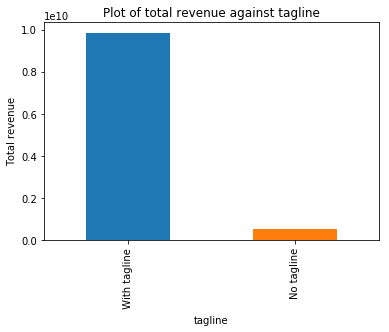

In [19]:
#Plotting our observation
df3=df1.groupby(['tagline'], as_index=True)['revenue'].sum()
df4 = df3.plot(kind='bar');
figsize=(10,6)
plt.xlabel('tagline')
plt.ylabel('Total revenue')
plt.title('Plot of total revenue against tagline')


This also shows that movies with tagline are associated higher revenue than those without

Now, we will compare the tagline column with the adjusted revenue column to see the correlation

Text(0.5,1,'Plot of total adjusted revenue against tagline')

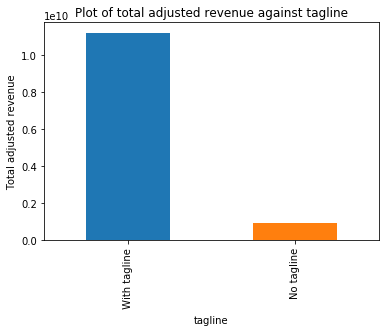

In [21]:
# Plotting our observation
df5=df1.groupby(['tagline'], as_index=True)['revenue_adj'].sum()
df6 = df5.plot(kind='bar');
figsize=(10,6)
plt.xlabel('tagline')
plt.ylabel('Total adjusted revenue')
plt.title('Plot of total adjusted revenue against tagline')




Similar result!!!

Now, let us plot the two results together on a line plot

Text(0.5,1,'Plot of total revenue against tagline')

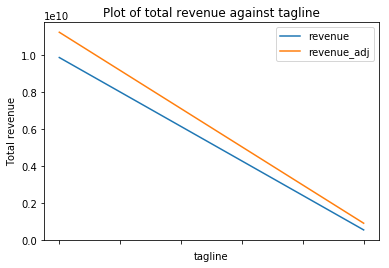

In [22]:
dfi=df1.groupby(['tagline'], as_index=True)['revenue','revenue_adj'].sum()
dfii = dfi.plot();
figsize=(10,6)
plt.xlabel('tagline')
plt.ylabel('Total revenue')
plt.title('Plot of total revenue against tagline')

This shows that the adjusted revenue is a little higher than revenue

Now, let us visualize this on a box plot

Text(0.5,1,'Plot of total revenue against tagline')

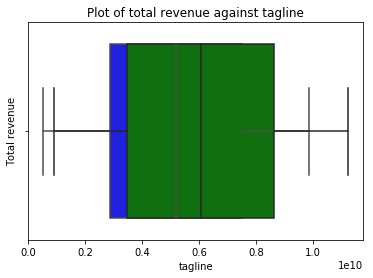

In [23]:
sns.boxplot(df1.groupby(['tagline'], as_index=True)['revenue'].sum(), color='b');
sns.boxplot(df1.groupby(['tagline'], as_index=True)['revenue_adj'].sum(), color='g');
figsize=(10,6)
plt.xlabel('tagline')
plt.ylabel('Total revenue')
plt.title('Plot of total revenue against tagline')

This shows that that total revenue adjusted exceeds the total revenue

### Research Question 2 :  What decade are the most popular movies released; how much revenue was recorded that year?

Firstly, let us investigate what year the most popular movies are released

In [12]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,tagline,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,With tagline,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,With tagline,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,With tagline,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,With tagline,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,With tagline,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


Let's take a look at the release year column:

In [24]:
to_describe('release_year')

count    10835.000000
mean      2001.308999
std         12.815519
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

Now let's group the release year into decades

In [25]:
df7=df['decade']=pd.cut(x=df['release_year'], bins = [1960,1970,1980,1990,2000,2010,2020], labels=['1960-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020'])
df7.unique()

[2011-2020, 1971-1980, 2001-2010, 1991-2000, 1981-1990, 1960-1970, NaN]
Categories (6, object): [1960-1970 < 1971-1980 < 1981-1990 < 1991-2000 < 2001-2010 < 2011-2020]

Now let's see with decade has the highest popularity

In [26]:
df.groupby(['decade'])['popularity'].sum()

decade
1960-1970     152.556053
1971-1980     270.655660
1981-1990     589.314645
1991-2000    1149.001910
2001-2010    2440.106945
2011-2020    2402.276456
Name: popularity, dtype: float64

From the result, it is oberved that popularity of movies increased from one decade to another until '2001-2010' which has the highest popularity. 

Text(0.5,1,'Plot of decade against sum of popularity')

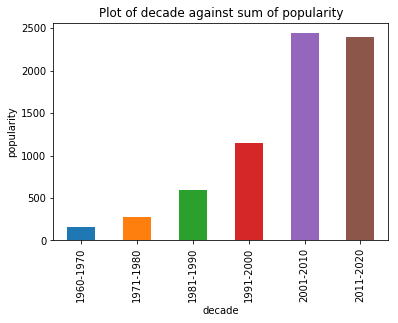

In [27]:
df7=df.groupby(['decade'])['popularity'].sum()
df8= df7.plot(kind='bar');
figsize=(10,6)
plt.xlabel('decade')
plt.ylabel('popularity')
plt.title('Plot of decade against sum of popularity')



The plot shows that 2010-2010 has the most popularity while 1960-1970 has the least

Now let's us compare the decade of release with total revenue

In [28]:
df.groupby(['decade'])['revenue'].sum()

decade
1960-1970      3431252010
1971-1980     11698477385
1981-1990     32736400569
1991-2000     84785928559
2001-2010    175761875232
2011-2020    124161254120
Name: revenue, dtype: int64

From this result, it is observed that total revenue increased over the decades, with 2001-2010 havin the highest total revenue.

Let's visualize this on a plot

Text(0.5,1,'Plot of decade againt total revenue')

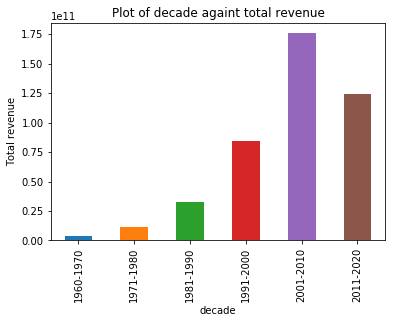

In [29]:
df8=df.groupby(['decade'])['revenue'].sum()
df9=df8.plot(kind='bar');
figsize=(10,6)
plt.xlabel('decade')
plt.ylabel('Total revenue')
plt.title('Plot of decade againt total revenue')




The company made the most profit in 2001-2010

Now, it would be interesting to compare the result about with the adjusted revenue like this:

In [30]:
df.groupby(['decade'])['revenue', 'revenue_adj'].sum()

,revenue,revenue_adj
decade,,
1960-1970,3431252010,2.256783e+10
1971-1980,11698477385,4.347959e+10
1981-1990,32736400569,6.369332e+10
1991-2000,84785928559,1.185163e+11
2001-2010,175761875232,1.922438e+11
2011-2020,124161254120,1.165552e+11


This shows that total revenue adjusted exceed total revenue

Let's visualize this together to gain better insight

We will plot this on a stacked bar chart

Text(0.5,1,'Plot of decade againt total revenue')

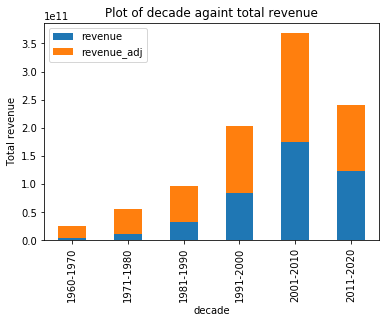

In [31]:
df10=df.groupby(['decade'])['revenue', 'revenue_adj'].sum()
df11=df10.plot(kind='bar', stacked=True);
figsize=(10,6)
plt.xlabel('decade')
plt.ylabel('Total revenue')
plt.title('Plot of decade againt total revenue')





This also shows that total revenue adjusted exceed total revenue

Text(0.5,1,'Plot of decade againt total revenue')

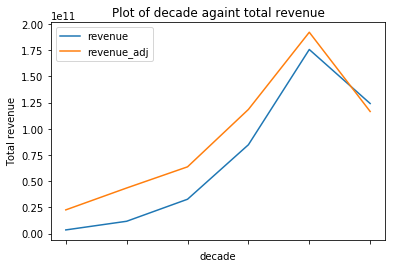

In [32]:
df10=df.groupby(['decade'], as_index=True)['revenue', 'revenue_adj'].sum()
#index = [1960-1970, 1971-1980, 1981-1990, 1991-2000, 2001-2010, 2011-2020]
df12=df10.plot.line();
figsize=(8,6)
plt.xlabel('decade')
plt.ylabel('Total revenue')
plt.title('Plot of decade againt total revenue')


This shows that total revenue dropped below revenue adjusted in 20

Now, let us represent this on an histogram

Text(0.5,1,'Plot of decade againt total revenue')

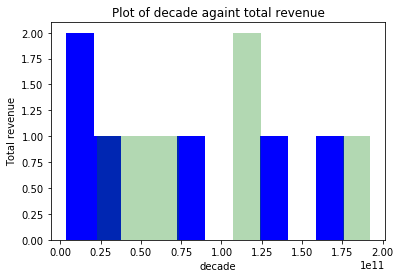

In [41]:
plt.hist(df.groupby(['decade'], as_index=True)['revenue'].sum(), facecolor = 'b', alpha=1, label='revenue')
plt.hist(df.groupby(['decade'], as_index=True)['revenue_adj'].sum(), facecolor = 'g', alpha=0.3, label='revenue_adj')
figsize=(8,6)
plt.xlabel('decade')
plt.ylabel('Total revenue')
plt.title('Plot of decade againt total revenue')

From this plot, it is evident that with respect to the adjusted revenue(revenue_adj), total revenue also increased across the decades with the exception of the 2001-2010 decade, which has the highest total revenue.

Conclusions:
1. From the result of this analysis, it can be concluded that the addittion of taglines to movies is associated with increase total revenue. This was found to be consistent when tagline was compared with total revenue and adjusted total revenue. Hence, it is a profitable to provide every movie with a tagline for maximum dividend.

2. From the result of this analysis, it can be concluded that the TMDB movie industry is gaining ground in the entertainment industry as thier movies seems to be making strides in popularity over the decade. Not just that, the companies recorded an increasing total renenue over the first five(5) decades in this case study.

3. From the result of this analysis, it can be concluded that the '2001-2010' decade is the most succesful decade for the TMDB movie industry in terms of revenue and popularity.


Limitations:
The imdb_id column in this database had ten (10) null values, these nulls were dropped in this analysis as that was the most convinent approach, since the imdb_id is a unique id for each movie.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0